## Импорт и данные

In [1]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

In [2]:
# Исходные данные

y = np.array([
35.83488772,
34.31569308,
34.73612749,
34.98917113,
32.16698793,
32.76083066,
31.86093498,
31.85640117,
28.23506211,
27.0833359,
26.48606139,
23.62631449,
23.88520323,
21.34163892,
20.57208069,
15.25025042,
14.5468144,
12.52902806,
8.860339343,
4.799946002
])

x = np.arange(1, 21)

---

## Калибровка моделей

In [3]:
def exponential(params): # задание экспоненциальной функции
    c1, c2, c3 = params
    sse = 0
    for i in range(len(x)):
        sse += (y[i] - (c1*np.exp(c2*x[i])+c3))**2
    return sse

In [ ]:
res = minimize(exponential, np.random.randint(-1000, 1000, 3)) # минимизация функции SSE
while res.fun > 20 and res.fun != 'nan':
    res = minimize(exponential, np.random.randint(-1000, 1000, 3))

In [5]:
res

      fun: 15.196852873206991
 hess_inv: array([[2.03271882e-06, 1.79878188e-07, 3.56961677e-05],
       [1.79878188e-07, 5.10610198e-07, 1.09686432e-04],
       [3.56961677e-05, 1.09686432e-04, 4.82186667e-02]])
      jac: array([6.55651093e-06, 1.62601471e-04, 1.43051147e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 703
      nit: 107
     njev: 173
   status: 2
  success: False
        x: array([-5.10760748,  0.09796925, 41.46581155])

In [6]:
f_exp = -5.10757257 * np.exp(0.09796952*x) + 41.46576603 # итоговая функция

---

In [7]:
def dif(params): # задание дифференциальной модели
    k1, k2, c = params
    sse = 0
    for i in range(len(x)):
        sse += (y[i] - (k1*(x[i]**2)/2 - k2*x[i] + c))**2
    return sse

In [8]:
init_2 = [1, 1, 1] # начальное предположение о параметрах 

In [9]:
minimize(dif, init_2)

      fun: 16.59304532153098
 hess_inv: array([[1.13821696e-04, 1.19500134e-03, 4.38045355e-03],
       [1.19500134e-03, 1.32981256e-02, 5.38834881e-02],
       [4.38045355e-03, 5.38834881e-02, 2.76454865e-01]])
      jac: array([0.00000000e+00, 2.38418579e-07, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([-1.48140764e-01, -1.79145357e-02,  3.52278526e+01])

In [10]:
f_dif = -0.148140764*(x**2)/2 + 0.0179145357*x + 35.2278526

---

In [11]:
def raz(params): # задание разностной модели
    L1, L2 = params
    p = y[0]
    sse = 0
    for i in range(1, len(x)-1):
        sse += (y[i] - (L1*p - L2))**2
        p = L1*p - L2
    return sse

In [12]:
init_3 = [1, 1]

In [13]:
minimize(raz, init_3)

      fun: 14.855129776140945
 hess_inv: array([[4.48953986e-05, 1.39532804e-03],
       [1.39532804e-03, 4.34218341e-02]])
      jac: array([ 9.17673111e-04, -2.76565552e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 120
      nit: 10
     njev: 36
   status: 2
  success: False
        x: array([1.09983063, 4.16954543])

In [14]:
f_raz = [y[0]]
p = y[0]
for i in range(1, len(y)):
    f_raz.append(1.09983063 * p - 4.16954543)
    p = 1.09983063 * p - 4.16954543

---

## Построение графиков функций

In [15]:
y_mean = y.mean()

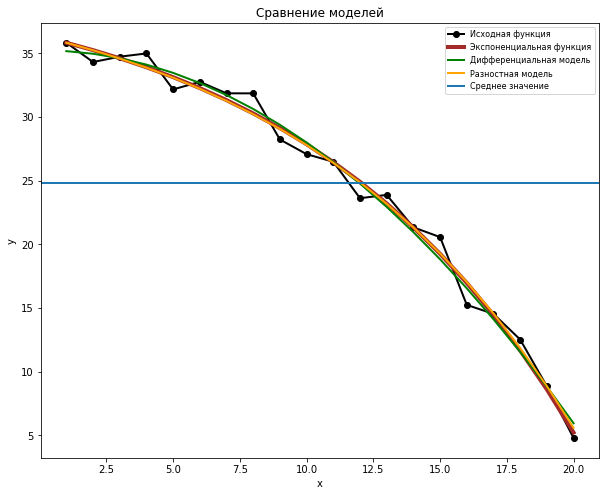

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(x, y, '-o', linewidth=2, color='black', label='Исходная функция')
plt.plot(x, f_exp, linewidth=4, color='brown', label='Экспоненциальная функция')
plt.plot(x, f_dif, linewidth=2, color='green', label='Дифференциальная модель')
plt.plot(x, f_raz, linewidth=2, color='orange', label='Разностная модель')
plt.axhline(y_mean, linewidth=2, label='Среднее значение')
plt.title('Сравнение моделей')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=8)
plt.show()

---

## Вычисление коэффициентов детерминации для моделей

In [17]:
# Вычисление SST
sst = 0
for i in range(len(x)):
    sst += (y[i] - y_mean)**2

In [18]:
round(sst, 2)

1685.04

In [19]:
R2_1 = 1 - 15.196852874023342 / sst
round(R2_1, 5) 

0.99098

In [20]:
R2_2 = 1 - 16.59304532153098 / sst
round(R2_2, 5)

0.99015

In [21]:
R2_3 = 1 - 14.855129776140945 / sst
round(R2_3, 5)

0.99118

---

## Итоги

In [24]:
table = [['Модель', 'Параметры', 'R2'],
         ['Экспоненциальная', [-5.10757257, 0.09796952, 41.46576603], 0.99098],
         ['Дифференциальное ур-е', [-0.148140764, -0.0179145357,  35.2278526], 0.99015],
         ['Разностное ур-е', [1.09983063, 4.16954543], 0.99118]]

In [25]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════════╤═══════════════════════════════════════════╤═════════╕
│ Модель                │ Параметры                                 │      R2 │
╞═══════════════════════╪═══════════════════════════════════════════╪═════════╡
│ Экспоненциальная      │ [-5.10757257, 0.09796952, 41.46576603]    │ 0.99098 │
├───────────────────────┼───────────────────────────────────────────┼─────────┤
│ Дифференциальное ур-е │ [-0.148140764, -0.0179145357, 35.2278526] │ 0.99015 │
├───────────────────────┼───────────────────────────────────────────┼─────────┤
│ Разностное ур-е       │ [1.09983063, 4.16954543]                  │ 0.99118 │
╘═══════════════════════╧═══════════════════════════════════════════╧═════════╛


Все модели имеют высокий показатель детерминации.